In [7]:
# Importando las librerías que vamos a utilizar
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

# graficos incrustados
%matplotlib inline

In [9]:
from scipy import stats
import missingno

In [12]:
df = pd.read_csv('hotel_bookings.csv')

In [13]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
41943,City Hotel,0,4,2015,August,35,27,0,2,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,79.0,0,2,Check-Out,2015-08-29
76723,City Hotel,0,6,2017,May,21,22,1,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,6,64,A,A,1,No Deposit,NaN,40.0,0,Transient,65.0,0,1,Check-Out,2017-05-24
114533,City Hotel,0,151,2017,June,25,19,1,3,2,0.0,0,HB,CHE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,162.0,0,3,Check-Out,2017-06-23
77993,City Hotel,1,45,2015,October,44,29,0,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,3.0,NaN,0,Transient,70.0,0,0,Canceled,2015-09-30
50631,City Hotel,1,134,2016,May,19,5,0,2,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,105.3,0,0,Canceled,2016-01-21


In [14]:
df.columns=['Hotel','IsCanceled','LeadTime','ArrivalDateYear','ArrivalDateMonth','ArrivalDateWeekNumber','ArrivalDateDayOfMonth','StaysInWeekendNights','StaysInWeekNights','Adults','Children','Babies','Meal','Country','MarketSegment','DistributionChannel','IsRepeatedGuest','PreviousCancellations','PreviousBookingsNotCanceled','ReservedRoomType','AssignedRoomType','BookingChanges','DepositType','Agent','Company','DaysInWaitingList','CustomerType','ADR','RequiredCarParkingSpaces','TotalOfSpecialRequests','ReservationStatus_','ReservationStatusDate']

In [15]:
df.columns

Index(['Hotel', 'IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType', 'BookingChanges', 'DepositType', 'Agent', 'Company', 'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'ReservationStatus_', 'ReservationStatusDate'], dtype='object')

In [16]:
# df.rename(columns={"Hola":"Hotel"}, inplace= True)

In [17]:
df.head(2)

,Hotel,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus_,ReservationStatusDate
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [18]:
df.shape

(119390, 32)

In [19]:
df.IsCanceled.value_counts()

IsCanceled
0    75166
1    44224
Name: count, dtype: int64

In [20]:
44224/(44224+75166)

0.37041628277075134

In [21]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsCanceled,119390.0,NaN,NaN,NaN,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
LeadTime,119390.0,NaN,NaN,NaN,104.011416,106.863097,0.0,18.0,69.0,160.0,737.0
ArrivalDateYear,119390.0,NaN,NaN,NaN,2016.156554,0.707476,2015.0,2016.0,2016.0,2017.0,2017.0
ArrivalDateMonth,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArrivalDateWeekNumber,119390.0,NaN,NaN,NaN,27.165173,13.605138,1.0,16.0,28.0,38.0,53.0
ArrivalDateDayOfMonth,119390.0,NaN,NaN,NaN,15.798241,8.780829,1.0,8.0,16.0,23.0,31.0
StaysInWeekendNights,119390.0,NaN,NaN,NaN,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
StaysInWeekNights,119390.0,NaN,NaN,NaN,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
Adults,119390.0,NaN,NaN,NaN,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Hotel                        119390 non-null  object 
 1   IsCanceled                   119390 non-null  int64  
 2   LeadTime                     119390 non-null  int64  
 3   ArrivalDateYear              119390 non-null  int64  
 4   ArrivalDateMonth             119390 non-null  object 
 5   ArrivalDateWeekNumber        119390 non-null  int64  
 6   ArrivalDateDayOfMonth        119390 non-null  int64  
 7   StaysInWeekendNights         119390 non-null  int64  
 8   StaysInWeekNights            119390 non-null  int64  
 9   Adults                       119390 non-null  int64  
 10  Children                     119386 non-null  float64
 11  Babies                       119390 non-null  int64  
 12  Meal                         119390 non-null  object 
 13 

In [23]:
#df.IsCanceled = df.IsCanceled.astype(object)
#df[['IsCanceled','ArrivalDateYear','ArrivalDateWeekNumber','ArrivalDateDayOfMonth','IsRepeatedGuest']]=df[['IsCanceled','ArrivalDateYear','ArrivalDateWeekNumber','ArrivalDateDayOfMonth','IsRepeatedGuest']].astype(object)

In [24]:
df = df.astype({'IsCanceled':'category','Children':'int64','IsRepeatedGuest':'category','ArrivalDateYear':'object','ArrivalDateWeekNumber':'object','ArrivalDateDayOfMonth':'object','Agent':'object','Company':'object'})

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer: Error while type casting for column 'Children'

In [ ]:
df.describe(include= "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsCanceled,119390.0,NaN,NaN,NaN,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
LeadTime,119390.0,NaN,NaN,NaN,104.011416,106.863097,0.0,18.0,69.0,160.0,737.0
ArrivalDateYear,119390.0,NaN,NaN,NaN,2016.156554,0.707476,2015.0,2016.0,2016.0,2017.0,2017.0
ArrivalDateMonth,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArrivalDateWeekNumber,119390.0,NaN,NaN,NaN,27.165173,13.605138,1.0,16.0,28.0,38.0,53.0
ArrivalDateDayOfMonth,119390.0,NaN,NaN,NaN,15.798241,8.780829,1.0,8.0,16.0,23.0,31.0
StaysInWeekendNights,119390.0,NaN,NaN,NaN,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
StaysInWeekNights,119390.0,NaN,NaN,NaN,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
Adults,119390.0,NaN,NaN,NaN,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0


In [35]:
df.isna().sum() / df.shape[0] *100

Hotel                           0.000000
IsCanceled                      0.000000
LeadTime                        0.000000
ArrivalDateYear                 0.000000
ArrivalDateMonth                0.000000
ArrivalDateWeekNumber           0.000000
ArrivalDateDayOfMonth           0.000000
StaysInWeekendNights            0.000000
StaysInWeekNights               0.000000
Adults                          0.000000
Children                        0.003350
Babies                          0.000000
Meal                            0.000000
Country                         0.408744
MarketSegment                   0.000000
DistributionChannel             0.000000
IsRepeatedGuest                 0.000000
PreviousCancellations           0.000000
PreviousBookingsNotCanceled     0.000000
ReservedRoomType                0.000000
AssignedRoomType                0.000000
BookingChanges                  0.000000
DepositType                     0.000000
Agent                          13.686238
Company         

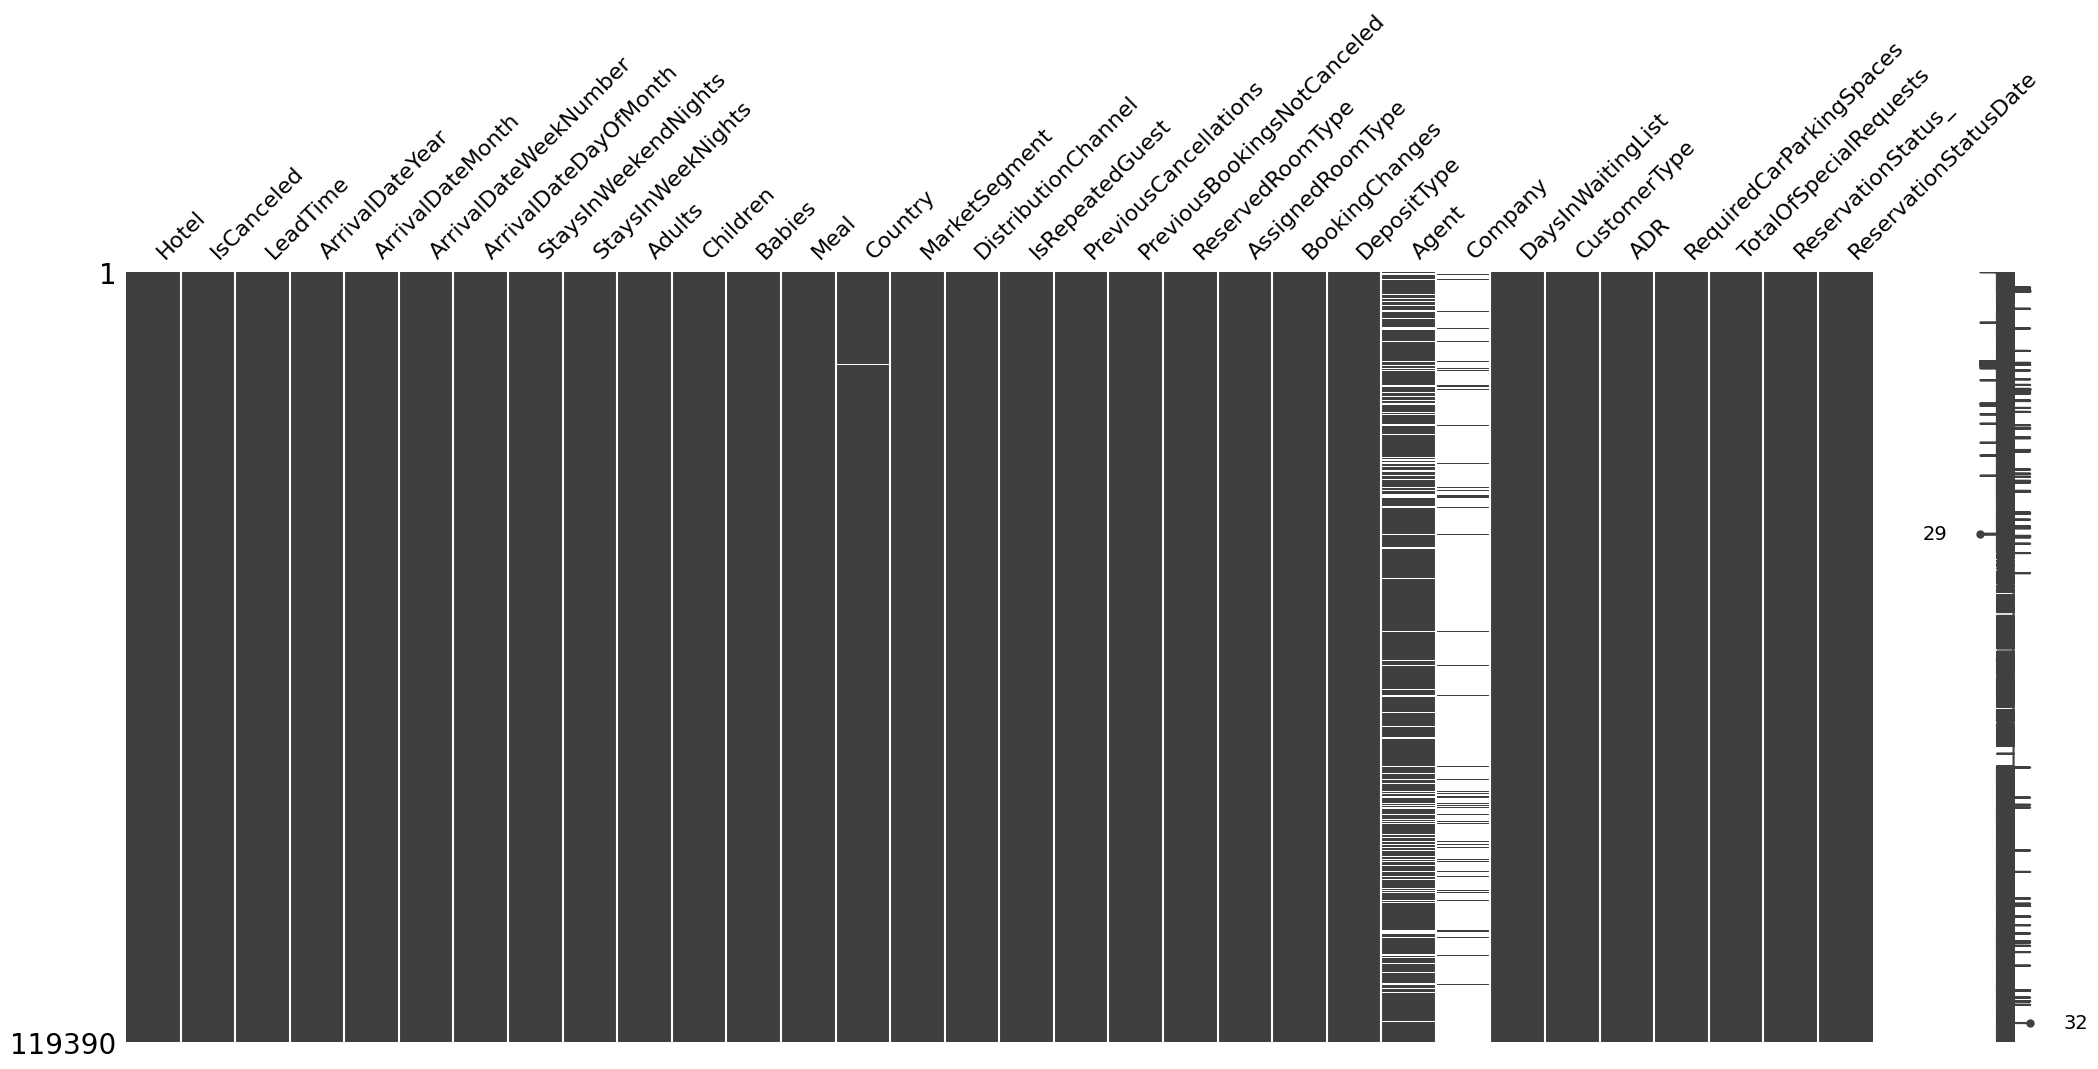

In [25]:
missingno.matrix(df)
plt.show()

In [36]:
df.Meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [58]:
# "meal" contains values "Undefined", which is equal to SC.
df["Meal"].replace("Undefined", "SC", inplace=True)

In [59]:
NanReplace = {"Country": "Unknown", "Agent": 0, "Company": 0}
df = df.fillna(NanReplace)
df["Children"]=df.Children.fillna(0)

In [40]:
missings=df.isnull().sum()

missings.columns = ['column_name','# missings']
missings.sort_values(ascending = False)

Hotel                          0
IsCanceled                     0
ReservationStatus_             0
TotalOfSpecialRequests         0
RequiredCarParkingSpaces       0
ADR                            0
CustomerType                   0
DaysInWaitingList              0
Company                        0
Agent                          0
DepositType                    0
BookingChanges                 0
AssignedRoomType               0
ReservedRoomType               0
PreviousBookingsNotCanceled    0
PreviousCancellations          0
IsRepeatedGuest                0
DistributionChannel            0
MarketSegment                  0
Country                        0
Meal                           0
Babies                         0
Children                       0
Adults                         0
StaysInWeekNights              0
StaysInWeekendNights           0
ArrivalDateDayOfMonth          0
ArrivalDateWeekNumber          0
ArrivalDateMonth               0
ArrivalDateYear                0
LeadTime  

In [44]:
df.IsCanceled.nunique()

2

In [ ]:
o=df.apply(lambda x: x.nunique())
o

In [45]:
o=df.apply(lambda x: x.unique())
o

Hotel                                                 [Resort Hotel, City Hotel]
IsCanceled                                                                [0, 1]
LeadTime                       [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
ArrivalDateYear                                               [2015, 2016, 2017]
ArrivalDateMonth               [July, August, September, October, November, D...
ArrivalDateWeekNumber          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
ArrivalDateDayOfMonth          [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
StaysInWeekendNights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
StaysInWeekNights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
Adults                         [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
Children                                              [0.0, 1.0, 2.0, 10.0, 3.0]
Babies                                                          [0, 1, 2, 10, 9]
Meal                        

In [62]:
df['Babies'].value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: Babies, dtype: int64

In [65]:
df.loc[df['Babies'].isin([9,10])]

,Hotel,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus_,ReservationStatusDate
46619,City Hotel,0,37,2016,January,3,12,0,2,2,0,10,BB,PRT,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,9.0,0.0,0,Transient,84.45,0,1,Check-Out,2016-01-14
78656,City Hotel,0,11,2015,October,42,11,2,1,1,0,9,BB,GBR,Corporate,Corporate,0,0,0,A,B,1,No Deposit,95.0,0.0,0,Transient-Party,95.00,0,0,Check-Out,2015-10-14


In [64]:
df.loc[df['Babies'].isin([9,10])].index

Int64Index([46619, 78656], dtype='int64')

In [66]:
df.drop(df.loc[df['Babies'].isin([9,10])].index, inplace=True)

In [75]:
df.loc[df['ADR'].isin([5400])]

,Hotel,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus_,ReservationStatusDate
48514,City Hotel,1,35,2016,March,13,25,0,1,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12.0,0.0,0,Transient,5400.0,0,0,Canceled,2016-02-19


In [76]:
drop=df.loc[df['ADR'].isin([5400])].index
df.loc[df['ADR'].isin([5400])]
df.drop(drop, inplace=True)

In [79]:
df.RequiredCarParkingSpaces>df.Adults

0         False
1         False
2         False
3         False
4         False
          ...  
119383    False
119384    False
119385    False
119386    False
119387    False
Length: 119387, dtype: bool

In [77]:
df['Parking>Adult']=df.RequiredCarParkingSpaces>df.Adults

In [78]:
df['Parking>Adult'].value_counts()

False    119371
True         16
Name: Parking>Adult, dtype: int64

In [81]:
drop=df.loc[df['Parking>Adult'].isin([True])].index
df.drop(drop, inplace=True)

In [85]:
df.drop(['Parking>Adult'], axis=1, inplace=True)

In [86]:
df.reset_index(drop=True, inplace=True)

In [87]:
columnas_numericas =df.select_dtypes(['int', 'float']).columns
columnas_numericas

Index(['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests'], dtype='object')

In [ ]:
df2=df

In [ ]:
for num_col in columnas_numericas:
    _, pval = stats.normaltest(df2[num_col])
    if(pval < 0.05):
        print("'{}',".format(num_col))

'LeadTime',
'ArrivalDateYear',
'ArrivalDateWeekNumber',
'ArrivalDateDayOfMonth',
'StaysInWeekendNights',
'StaysInWeekNights',
'Adults',
'Children',
'Babies',
'PreviousCancellations',
'PreviousBookingsNotCanceled',
'BookingChanges',
'DaysInWaitingList',
'ADR',
'RequiredCarParkingSpaces',
'TotalOfSpecialRequests',


In [ ]:
features_to_normalize=['LeadTime',
'StaysInWeekendNights',
'StaysInWeekNights',
'Adults',
'Children',
'Babies',
'PreviousCancellations',
'PreviousBookingsNotCanceled',
'BookingChanges',
'DaysInWaitingList',
'ADR',
'RequiredCarParkingSpaces',
'TotalOfSpecialRequests']

In [ ]:
df[features_to_normalize] = df[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [ ]:
df.describe()

,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,119387.000000,119387.000000,119387.00000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000,119387.000000
mean,0.141131,2016.156566,27.16537,15.798236,0.048821,0.050007,0.033753,0.010389,0.003895,0.003351,0.001904,0.010529,0.005937,0.209472,0.007815,0.114274
std,0.144998,0.707477,13.60500,8.780882,0.052559,0.038166,0.010532,0.039856,0.044667,0.032475,0.020798,0.031062,0.045000,0.093253,0.030662,0.158561
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.024423,2016.000000,16.00000,8.000000,0.000000,0.020000,0.036364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.146539,0.000000,0.000000
50%,0.093623,2016.000000,28.00000,16.000000,0.052632,0.040000,0.036364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.195476,0.000000,0.000000
75%,0.217096,2017.000000,38.00000,23.000000,0.105263,0.060000,0.036364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.256362,0.000000,0.200000
max,1.000000,2017.000000,53.00000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.head()

,Hotel,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus_,ReservationStatusDate,Parking>Adult
0,Resort Hotel,0,0.464043,2015,July,27,1,0.0,0.00,0.036364,0.0,0.0,BB,PRT,Direct,Direct,0,0.0,0.0,C,C,0.142857,No Deposit,NaN,NaN,0.0,Transient,0.012355,0.0,0.0,Check-Out,2015-07-01,False
1,Resort Hotel,0,1.000000,2015,July,27,1,0.0,0.00,0.036364,0.0,0.0,BB,PRT,Direct,Direct,0,0.0,0.0,C,C,0.190476,No Deposit,NaN,NaN,0.0,Transient,0.012355,0.0,0.0,Check-Out,2015-07-01,False
2,Resort Hotel,0,0.009498,2015,July,27,1,0.0,0.02,0.018182,0.0,0.0,BB,GBR,Direct,Direct,0,0.0,0.0,A,C,0.000000,No Deposit,NaN,NaN,0.0,Transient,0.157597,0.0,0.0,Check-Out,2015-07-02,False
3,Resort Hotel,0,0.017639,2015,July,27,1,0.0,0.02,0.018182,0.0,0.0,BB,GBR,Corporate,Corporate,0,0.0,0.0,A,A,0.000000,No Deposit,304,NaN,0.0,Transient,0.157597,0.0,0.0,Check-Out,2015-07-02,False
4,Resort Hotel,0,0.018996,2015,July,27,1,0.0,0.04,0.036364,0.0,0.0,BB,GBR,Online TA,TA/TO,0,0.0,0.0,A,A,0.000000,No Deposit,240,NaN,0.0,Transient,0.202138,0.0,0.2,Check-Out,2015-07-03,False


In [ ]:
zero_guests = df[(df['Adults']==0) & (df['Children']==0) & (df['Babies']==0)].index
zero_guests

Int64Index([  2224,   2409,   3181,   3684,   3708,   4127,   9376,  31765,  32029,  32827,
            ...
            112558, 113188, 114583, 114908, 114911, 115029, 115091, 116251, 116534, 117087], dtype='int64', length=180)

In [ ]:
def week_function(feature1, feature2, data_source):
    data_source['weekend_or_weekday'] = 0
    for i in range(0, len(data_source)):
        if feature2.iloc[i] == 0 and feature1.iloc[i] > 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_just_weekend'
        if feature2.iloc[i] > 0 and feature1.iloc[i] == 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_just_weekday'
        if feature2.iloc[i] > 0 and feature1.iloc[i] > 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_both_weekday_and_weekend'
        if feature2.iloc[i] == 0 and feature1.iloc[i] == 0:
            df['weekend_or_weekday'].iloc[i] = 'undefined_data'

week_function(df['StaysInWeekendNights'],df['StaysInWeekNights'],df)

/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119387 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Hotel                        119387 non-null  object  
 1   IsCanceled                   119387 non-null  category
 2   LeadTime                     119387 non-null  float64 
 3   ArrivalDateYear              119387 non-null  int64   
 4   ArrivalDateMonth             119387 non-null  object  
 5   ArrivalDateWeekNumber        119387 non-null  int64   
 6   ArrivalDateDayOfMonth        119387 non-null  int64   
 7   StaysInWeekendNights         119387 non-null  float64 
 8   StaysInWeekNights            119387 non-null  float64 
 9   Adults                       119387 non-null  float64 
 10  Children                     119387 non-null  float64 
 11  Babies                       119387 non-null  float64 
 12  Meal                         119387 non-null

In [ ]:
df.drop(zero_guests, inplace=True)

In [ ]:
df3=df[['Country','Agent','Company']]


Preview of data with null values:
xxxxxxxxxxxxx


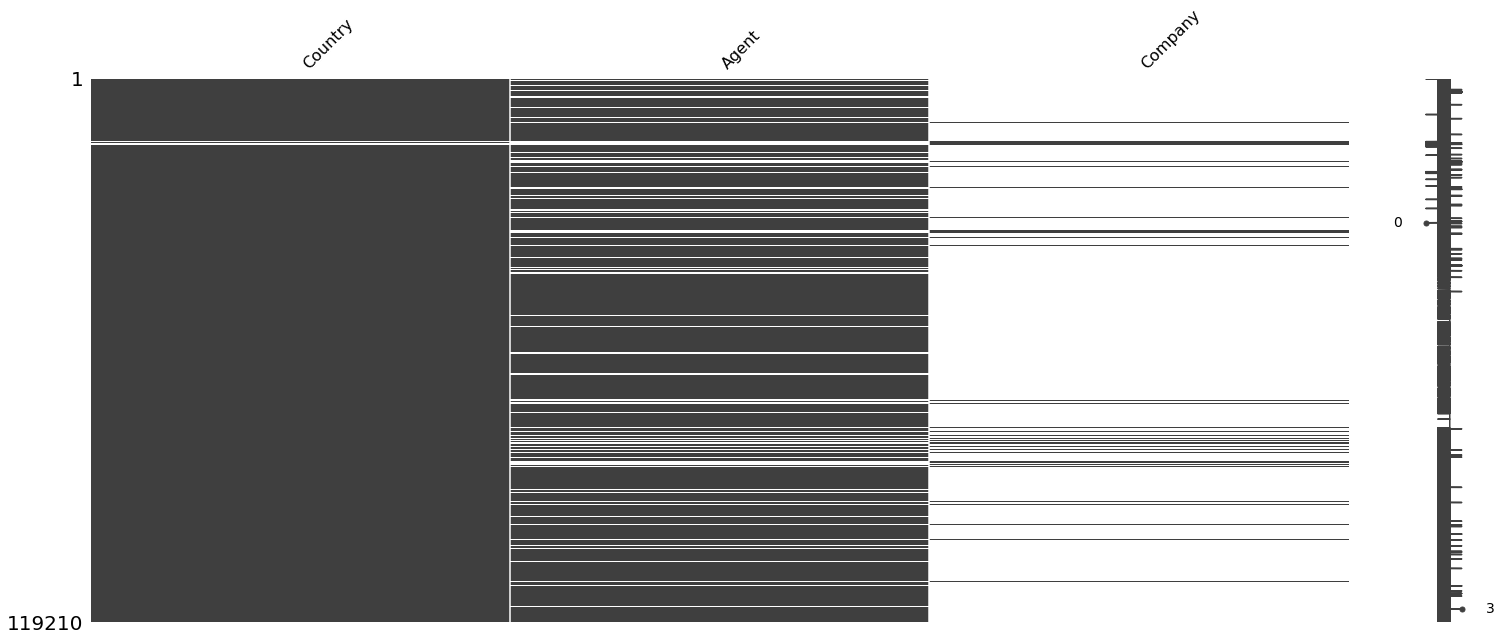

In [ ]:
if len(df3[df3.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    missingno.matrix(df3)
    plt.show()

In [ ]:
missings=df.isnull().sum()

missings.columns = ['column_name','# missings']
missings.sort_values(ascending = False)

Company                        112442
Agent                           16280
Country                           478
Children                            4
LeadTime                            0
ArrivalDateYear                     0
ArrivalDateMonth                    0
ArrivalDateWeekNumber               0
IsCanceled                          0
MarketSegment                       0
ArrivalDateDayOfMonth               0
StaysInWeekendNights                0
StaysInWeekNights                   0
Adults                              0
Babies                              0
Meal                                0
ReservationStatusDate               0
DistributionChannel                 0
ReservationStatus_                  0
IsRepeatedGuest                     0
PreviousCancellations               0
PreviousBookingsNotCanceled         0
ReservedRoomType                    0
AssignedRoomType                    0
BookingChanges                      0
DepositType                         0
DaysInWaitin

In [ ]:
o=df.apply(lambda x: x.nunique())
o.columns = ['column_name','# unique values']
o.sort_values(ascending = False)

ADR                            8866
ReservationStatusDate           926
LeadTime                        479
Company                         349
Agent                           334
Country                         178
DaysInWaitingList               127
PreviousBookingsNotCanceled      73
ArrivalDateWeekNumber            53
StaysInWeekNights                33
ArrivalDateDayOfMonth            31
BookingChanges                   19
StaysInWeekendNights             17
PreviousCancellations            15
Adults                           14
ArrivalDateMonth                 12
AssignedRoomType                 11
ReservedRoomType                  9
MarketSegment                     8
TotalOfSpecialRequests            6
Children                          5
DistributionChannel               5
Babies                            5
RequiredCarParkingSpaces          5
Meal                              4
CustomerType                      4
ReservationStatus_                3
DepositType                 

In [ ]:
df.DepositType.value_counts()

No Deposit    104461
Non Refund     14587
Refundable       162
Name: DepositType, dtype: int64

In [ ]:
def fam(df):
    if ((df['Adults'] > 0) and (df['Children'] > 0 or df['Babies'] > 0)):
        a = 1
    else:
        a = 0
    return a

df["Family"] = df.apply(fam, axis = 1)


In [ ]:
df.ReservationStatus_.value_counts()

Check-Out    75011
Canceled     42993
No-Show       1206
Name: ReservationStatus_, dtype: int64

In [ ]:
df["TotalCustomers"] = df["Adults"] + df["Children"] + df["Babies"]
df["Deposit"] = df.DepositType.eq('Non Refund').mul(1)
df["ReservationStatus"] = df.ReservationStatus_.eq('Check-Out').mul(1)
df["TotalNights"] = df["StaysInWeekendNights"]+ df["StaysInWeekNights"]
df["Kids"]=df["Children"] + df["Babies"]



In [ ]:
df2=df


In [ ]:
df2.Company.fillna('0')

0         0
1         0
2         0
8         0
9         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: Company, Length: 119382, dtype: object

In [ ]:
df.Deposit.value_counts()

0    104623
1     14587
Name: Deposit, dtype: int64

In [ ]:
df.Family.value_counts()

0    110101
1      9109
Name: Family, dtype: int64

Text(0, 0.5, 'Lead Time')

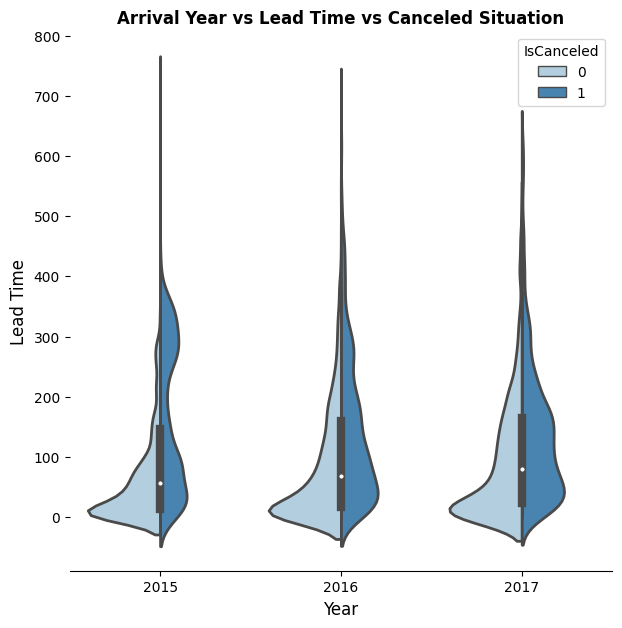

In [ ]:
sns.set_palette("Blues")
plt.figure(figsize=(7,7))
sns.violinplot(x='ArrivalDateYear', y ='LeadTime', hue="IsCanceled", data=df, palette="Blues", bw=.2,
               cut=2, linewidth=2, iner= 'box', split = True)
sns.despine(left=True)
plt.title('Arrival Year vs Lead Time vs Canceled Situation', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)

In [ ]:
df2.drop(['ArrivalDateMonth','Company','ReservationStatus','ArrivalDateWeekNumber','ArrivalDateDayOfMonth','Children','Babies','AssignedRoomType','DepositType','ReservationStatus_','ReservationStatusDate'],inplace=True, axis=1)

In [ ]:
model_df = df2

In [ ]:

df_dummies = pd.get_dummies(model_df.drop(columns=['IsCanceled']))

In [ ]:
y = df2['IsCanceled']
X = df_dummies

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
sc = StandardScaler()

sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfl = RandomForestClassifier()
rfl.fit(X_train_std, y_train)
y_rfl_pred = rfl.predict(X_test_std)

print('Accuracy: %.4f' % accuracy_score(y_test, y_rfl_pred))
print(confusion_matrix(y_test, y_rfl_pred))
print(classification_report(y_test,y_rfl_pred))

Accuracy: 0.8792
[[20842  1609]
 [ 2717 10647]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     22451
           1       0.87      0.80      0.83     13364

    accuracy                           0.88     35815
   macro avg       0.88      0.86      0.87     35815
weighted avg       0.88      0.88      0.88     35815



In [ ]:
importances = rfl.feature_importances_

In [ ]:
indices = np.argsort(importances)[::-1]
feat_labels = X.columns[:]

for f in range(X_train_std.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

 1) LeadTime                       0.158679
 2) ADR                            0.115075
 3) Deposit                        0.073630
 4) TotalOfSpecialRequests         0.066664
 5) Country_PRT                    0.066505
 6) StaysInWeekNights              0.052030
 7) StaysInWeekendNights           0.032486
 8) PreviousCancellations          0.027352
 9) BookingChanges                 0.024026
10) RequiredCarParkingSpaces       0.021520
11) MarketSegment_Groups           0.018041
12) CustomerType_Transient         0.017116
13) Agent_9.0                      0.016777
14) Adults                         0.016391
15) CustomerType_Transient-Party   0.014870
16) MarketSegment_Online TA        0.012386
17) DistributionChannel_TA/TO      0.009488
18) Country_GBR                    0.009297
19) Country_FRA                    0.008852
20) MarketSegment_Offline TA/TO    0.008568
21) Country_DEU                    0.007673
22) Agent_1.0                      0.007382
23) Agent_240.0                 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train_std, y_train)
y_clf_pred = clf.predict(X_test_std)

print('Accuracy: %.4f' % accuracy_score(y_test, y_clf_pred))
print(confusion_matrix(y_test, y_clf_pred))
print(classification_report(y_test,y_clf_pred))

Accuracy: 1.0000
[[22451     0]
 [    0 13364]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22451
           1       1.00      1.00      1.00     13364

    accuracy                           1.00     35815
   macro avg       1.00      1.00      1.00     35815
weighted avg       1.00      1.00      1.00     35815



In [ ]:
df

,Hotel,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus_,ReservationStatusDate,Family,TotalCustomers,Deposit,ReservationStatus,TotalNights,Kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2.0,0,1,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2.0,0,1,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1.0,0,1,1,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1.0,0,1,1,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,0,2.0,0,1,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,0,2.0,0,1,7,0.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,0,3.0,0,1,7,0.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,0,2.0,0,1,7,0.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,0,2.0,0,1,7,0.0


In [ ]:
df.ReservationStatus.value_counts()

1    75166
0    44224
Name: ReservationStatus, dtype: int64

In [ ]:
79330/(79330+40060)

0.6644610101348521

In [ ]:
df.to_csv('data.csv')

<AxesSubplot:>

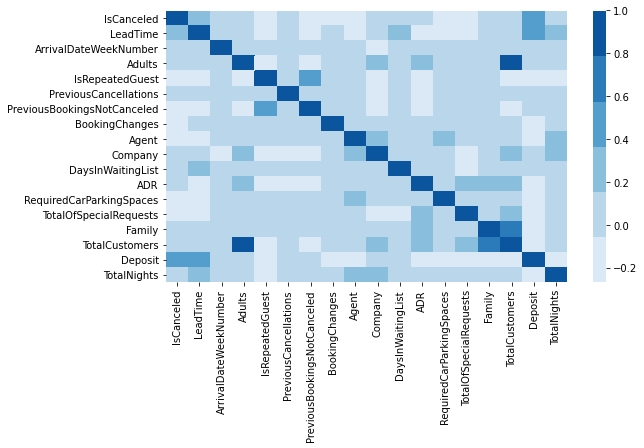

In [ ]:
plt.figure(figsize = (9,5))
corr=df2.corr()
sns.heatmap(corr,
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values, cmap=sns.color_palette("Blues"))

<AxesSubplot:>

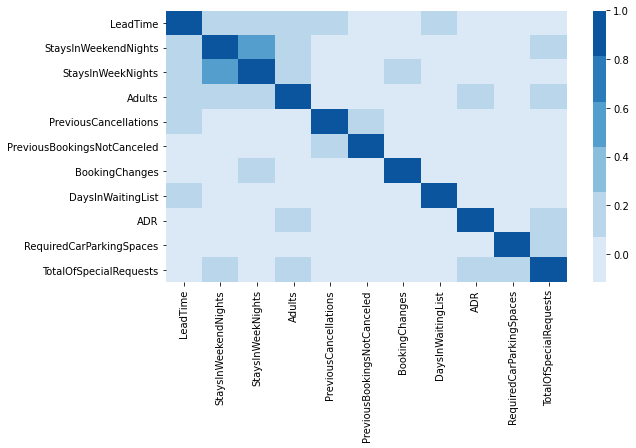

In [ ]:
plt.figure(figsize = (9,5))

sns.heatmap(corr,
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values, cmap=sns.color_palette("Blues"))

In [ ]:
def month_converter(month):
    months = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
    return months.index(month) + 1
df['ArrivalMonth'] = df['ArrivalDateMonth'].apply(month_converter)
df['ArrivalDate'] = df['ArrivalDateYear'].astype(str) + "-" + df['ArrivalMonth'].astype(str)+ "-" + df['ArrivalDateDayOfMonth'].astype(str)

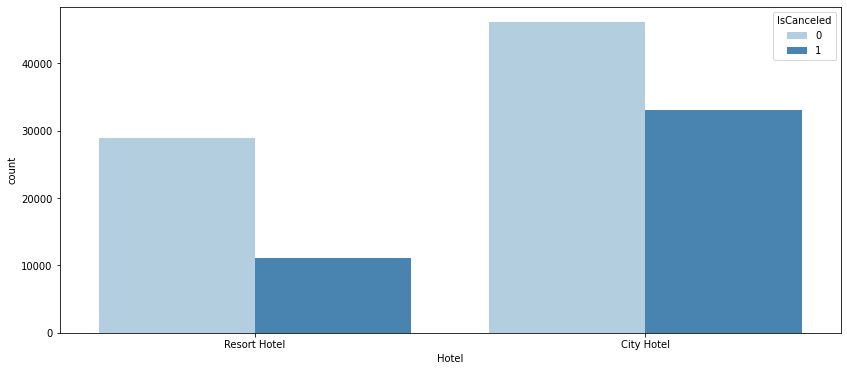

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(x='Hotel',data=df,hue='IsCanceled',palette='Blues')
plt.show()

In [ ]:
df2=df

In [ ]:
df2=df2.drop(['ArrivalMonth','ArrivalDateYear','ArrivalDateDayOfMonth','Kids','Babies', 'Children', 'DepositType'], axis=1)

In [ ]:
corr=t.corr()

In [ ]:
corr.to_csv('corr.csv')

In [ ]:
corr['IsCanceled'].sort_values()


ReservationStatus             -1.000000
TotalOfSpecialRequests        -0.234658
RequiredCarParkingSpaces      -0.195498
BookingChanges                -0.144381
IsRepeatedGuest               -0.084793
Company                       -0.082995
PreviousBookingsNotCanceled   -0.057358
Agent                         -0.046529
Family                        -0.013010
StaysInWeekendNights          -0.001791
ArrivalDateWeekNumber          0.008148
TotalNights                    0.017779
StaysInWeekNights              0.024765
TotalCustomers                 0.046506
ADR                            0.047557
DaysInWaitingList              0.054186
Adults                         0.060017
PreviousCancellations          0.110133
LeadTime                       0.293123
Deposit                        0.481457
IsCanceled                     1.000000
Name: IsCanceled, dtype: float64

In [ ]:
df2=df2.drop(['ReservationStatus','StaysInWeekNights','StaysInWeekendNights'], axis=1)

In [ ]:
df2=df2.drop(['ReservationStatus','StaysInWeekNights','StaysInWeekendNights'], axis=1)

In [ ]:
arr=df["LeadTime"]

In [ ]:
arr.mean()

104.01141636652986

In [ ]:
from datetime import datetime

Text(0, 0.5, 'Lead Time')

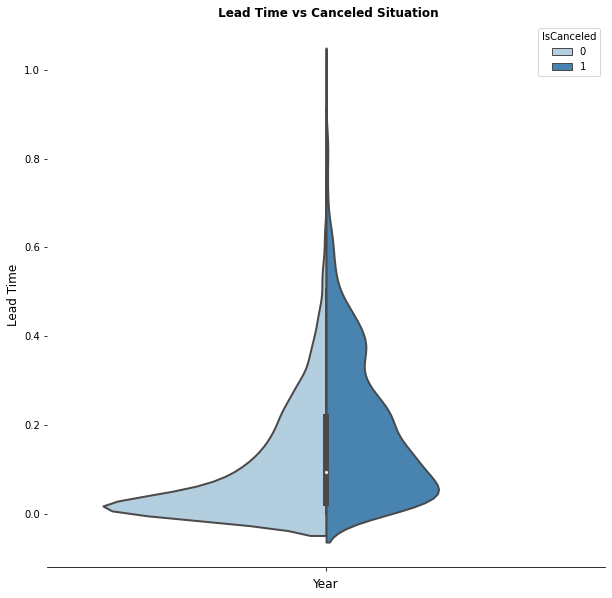

In [ ]:

plt.figure(figsize=(10,10))
df["all"] = ""
sns.violinplot( x='all' ,y ='LeadTime', hue="IsCanceled", data=df, palette="Blues", bw=.2,
               cut=2, linewidth=2, iner= 'box', split = True)
sns.despine(left=True)
plt.title(' Lead Time vs Canceled Situation', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)